In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
#from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random 
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
# os.chdir(r'D:\senior year\GP\datasets\dataset-augmented trial\augmented test-train')
# if os.path.isdir('train/0/') is False:
#     os.mkdir('train')
#     #os.mkdir('valid')
#     os.mkdir('test')

#     for i in range(0,106): #number of classes
#         shutil.move(f'{i}','train')
# #         os.mkdir(f'valid/{i}')
#         os.mkdir(f'test/{i}')

# #         valid_samples = random.sample(os.listdir(f'train/{i}'),100) #100 sore mnn al train to valid from every class(100*10)
# #         for j in valid_samples:
# #             shutil.move(f'train/{i}/{j}', f'valid/{i}')

#         test_samples = random.sample(os.listdir(f'train/{i}'),20) #50 sora mn al train to test ly kol class
#         for k in test_samples:
#             shutil.move(f'train/{i}/{k}', f'test/{i}')
# os.chdir('../..')


In [34]:
train_path = r'D:\senior year\GP\datasets\dataset-augmented trial\train'
# valid_path = r'D:\senior year\GP\datasets\ragaadataset\AFULL-CLASSES\10 classes with validation\valid'
test_path = r'D:\senior year\GP\datasets\dataset-augmented trial\test'

#print('total dataset is 4220 image:')
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, 
    target_size=(224,224),
    batch_size=10)

# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=valid_path,
#     target_size=(224,224), 
#     batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    batch_size=10, 
    shuffle=False)

Found 9243 images belonging to 106 classes.
Found 2120 images belonging to 106 classes.


In [35]:
mobile= tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [36]:
x = mobile.layers[-6].output #hakhod al hidden layers mn mobile kolo ela akher 6
x

<tf.Tensor 'global_average_pooling2d_1/Mean:0' shape=(None, 1024) dtype=float32>

In [37]:
output =  Dense(units=106, activation ='softmax')(x)
#dense new hidden layer

In [38]:
model = Model(inputs=mobile.input, outputs=output) #new model x + dense layer

In [39]:
for layer in model.layers[:-23]: #only train the last 23 layers in our new model
    layer.trainable=False 

In [40]:
model.summary() #our new model (model-6 + dense)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [41]:
model.compile(optimizer=Adam(lr=0.0100), loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
import time

start = time.time()
history = model.fit(x=train_batches,
#          steps_per_epoch=len(train_batches), #no batch size, kol epoch btakhod kol al train images
                     batch_size=128,
#          validation_data=valid_batches,
#          validation_steps=len(valid_batches),
         epochs=30,
         verbose=2)
stop = time.time()
print(f"Training time: {(stop - start)/60} min")
#val watya acc 3alya = overfitting

Epoch 1/30
925/925 - 330s - loss: 2.0069 - accuracy: 0.5218
Epoch 2/30
925/925 - 302s - loss: 0.5293 - accuracy: 0.8450
Epoch 3/30
925/925 - 307s - loss: 0.3312 - accuracy: 0.9001
Epoch 4/30
925/925 - 320s - loss: 0.2569 - accuracy: 0.9215
Epoch 5/30
925/925 - 307s - loss: 0.1983 - accuracy: 0.9423
Epoch 6/30
925/925 - 308s - loss: 0.1769 - accuracy: 0.9481
Epoch 7/30
925/925 - 306s - loss: 0.1387 - accuracy: 0.9581
Epoch 8/30
925/925 - 307s - loss: 0.1236 - accuracy: 0.9623
Epoch 9/30
925/925 - 306s - loss: 0.1066 - accuracy: 0.9672
Epoch 10/30
925/925 - 307s - loss: 0.1001 - accuracy: 0.9715
Epoch 11/30
925/925 - 308s - loss: 0.0858 - accuracy: 0.9733
Epoch 12/30
925/925 - 309s - loss: 0.0706 - accuracy: 0.9788
Epoch 13/30
925/925 - 308s - loss: 0.0780 - accuracy: 0.9777
Epoch 14/30
925/925 - 310s - loss: 0.0779 - accuracy: 0.9751
Epoch 15/30
925/925 - 308s - loss: 0.0731 - accuracy: 0.9777
Epoch 16/30
925/925 - 307s - loss: 0.0546 - accuracy: 0.9843
Epoch 17/30
925/925 - 308s - loss

In [43]:
test_labels = test_batches.classes
# test_labels

In [44]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [45]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
cm

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 20,  0, ...,  0,  0,  0],
       [ 0,  0, 19, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 20,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  1,  0, ...,  0,  0, 15]], dtype=int64)

In [46]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    #this function prints and plots the confusion matrix
    plt.figure(figsize = (50,50))
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                horizontalalignment = "center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('true/real label')
    plt.xlabel('predicted label')

In [63]:
# test_batches.class_indices

In [48]:
number_of_classes = 106
cm_plot_labels = []
for i in range(0, number_of_classes):
    cm_plot_labels.append(i)
    
# print(cm_plot_labels)    

confusion matrix, without normalization
[[20  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  1  0 ...  0  0 15]]


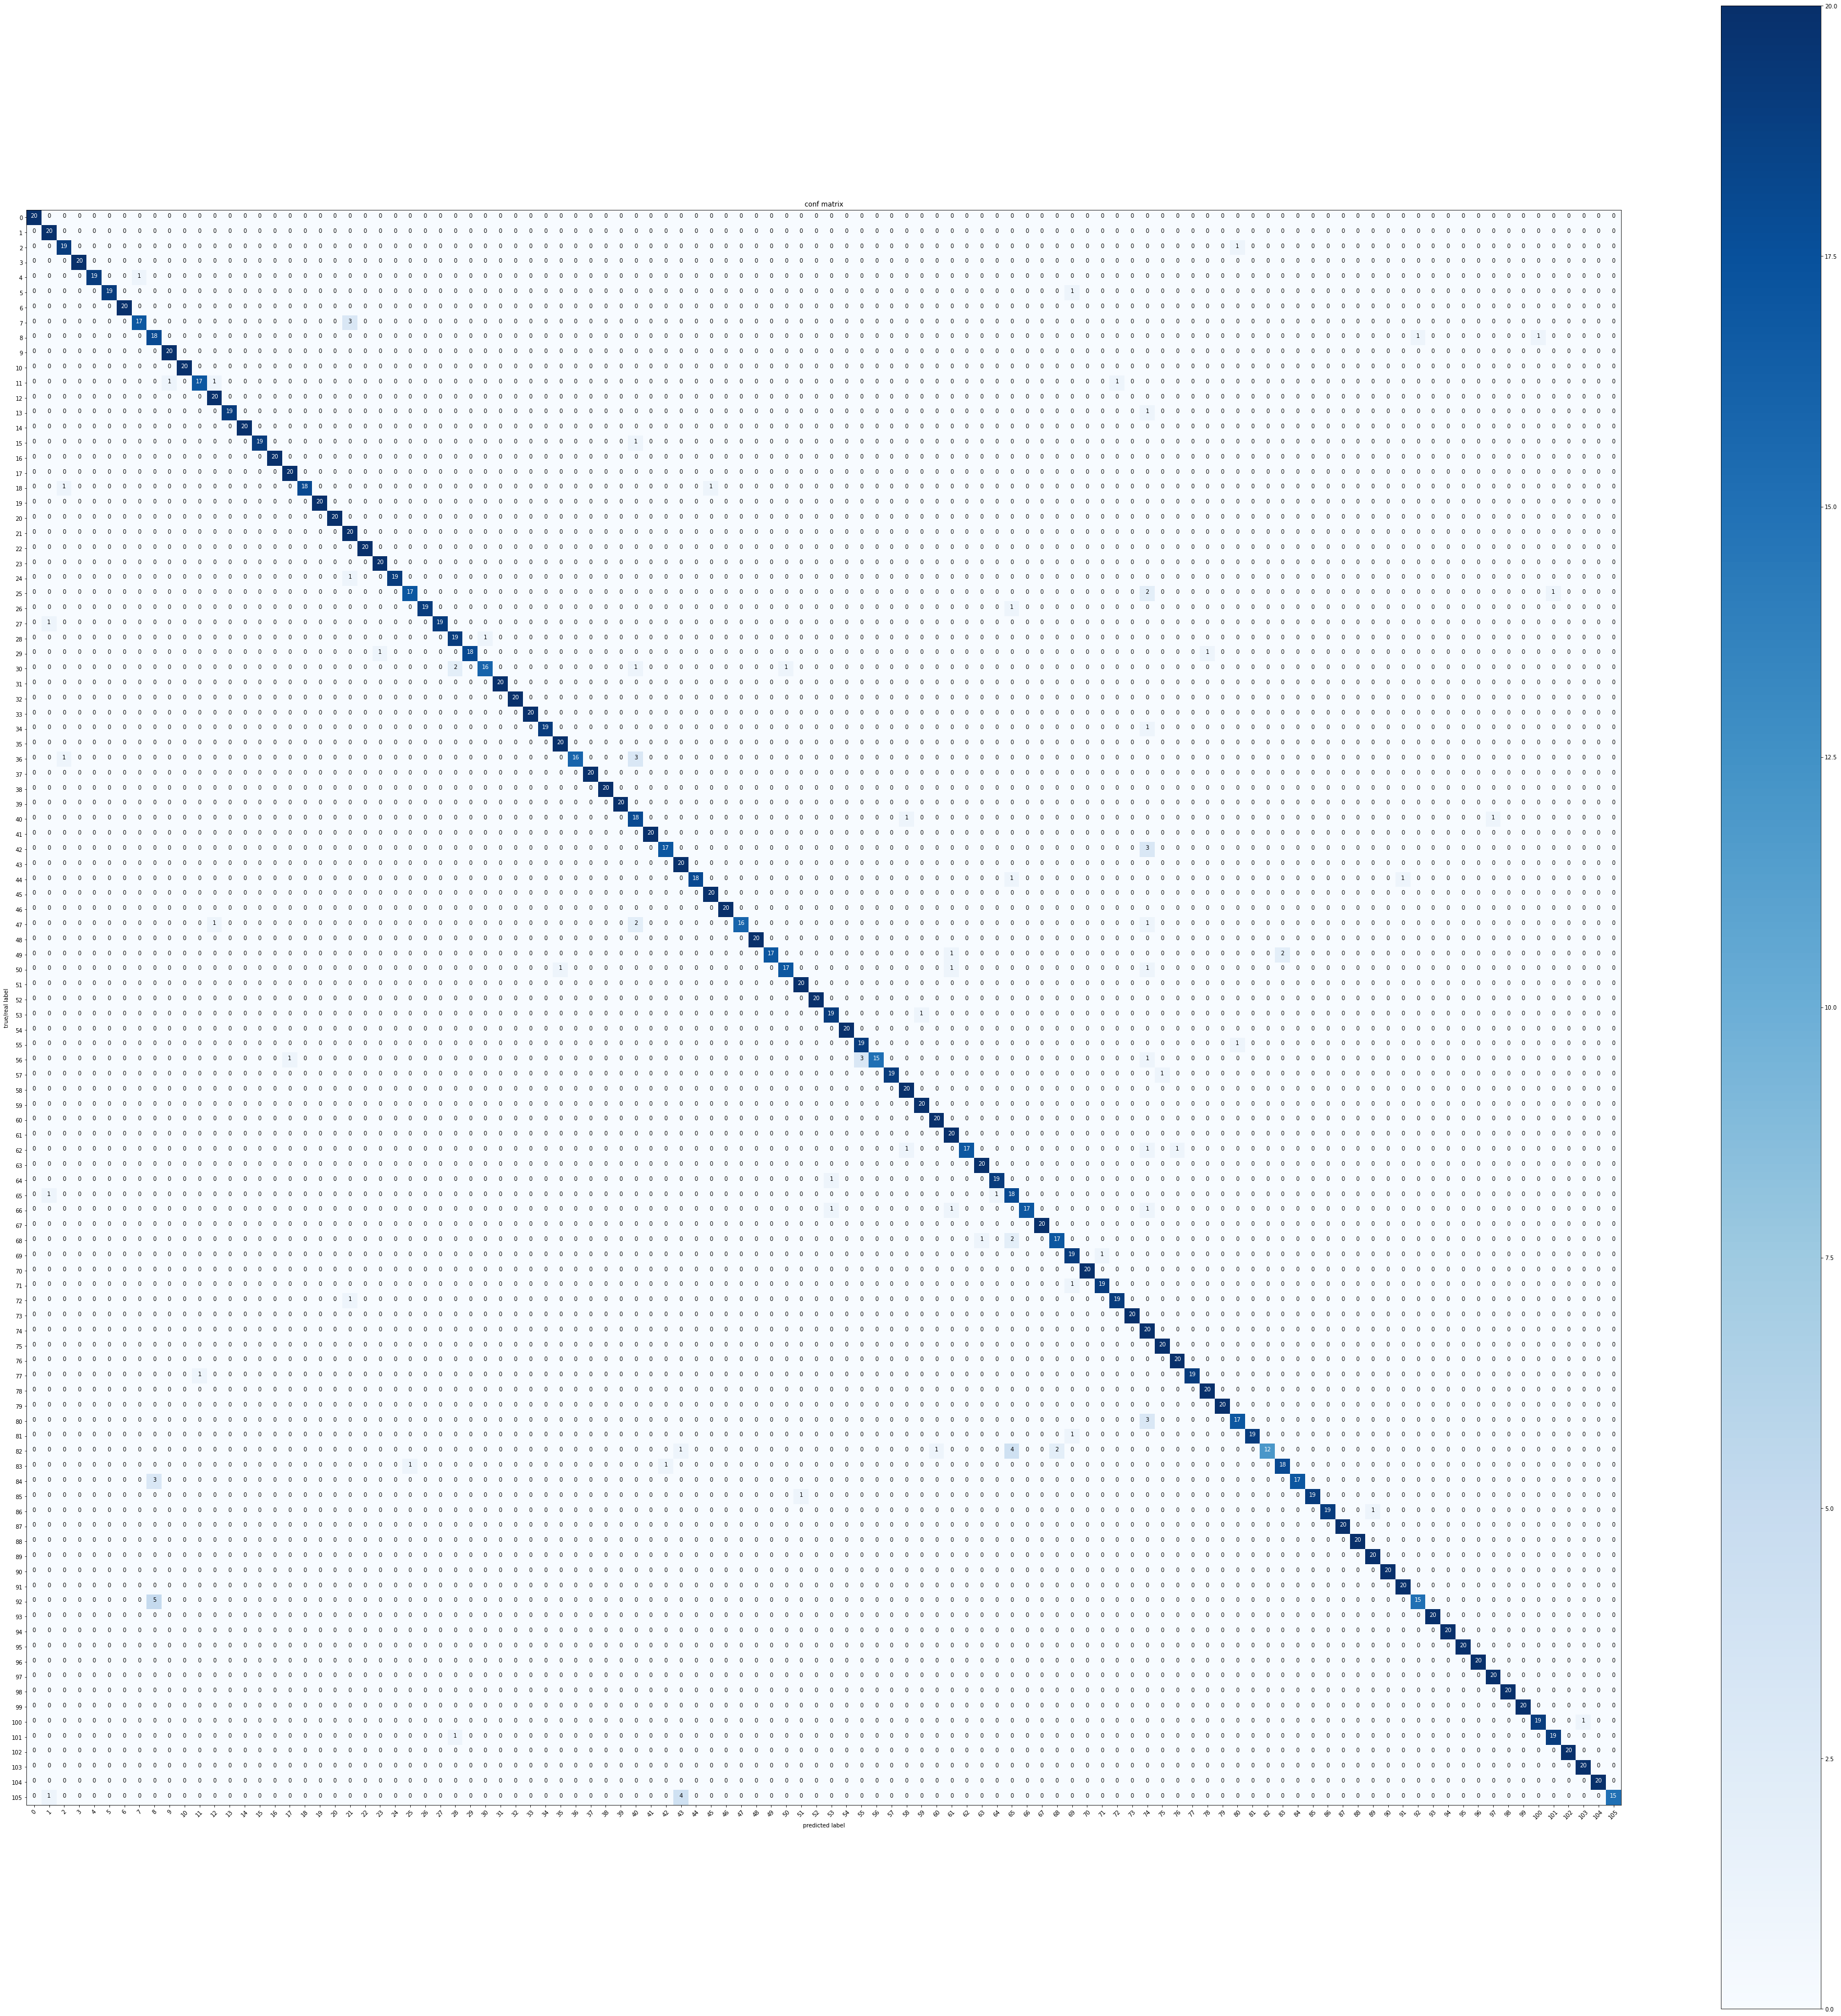

In [49]:
# cm_plot_labels=['0','1','2','3','4','5','6','7','8','9']
# cm_plot_labels=['0','1','2','3','4']
# cm_plot_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="conf matrix")

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# test_x=np.array(test_samples)
# y_pred=model.predict(test_x)
# y_pred=np.argmax(y_pred,axis=1)

y_pred=predictions.argmax(axis=1)
print(classification_report(y_pred,test_batches.classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.87      0.93        23
           2       0.95      0.90      0.93        21
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.97        19
           5       0.95      1.00      0.97        19
           6       1.00      1.00      1.00        20
           7       0.85      0.94      0.89        18
           8       0.90      0.69      0.78        26
           9       1.00      0.95      0.98        21
          10       1.00      1.00      1.00        20
          11       0.85      0.94      0.89        18
          12       1.00      0.91      0.95        22
          13       0.95      1.00      0.97        19
          14       1.00      1.00      1.00        20
          15       0.95      1.00      0.97        19
          16       1.00      1.00      1.00        20
          17       1.00    

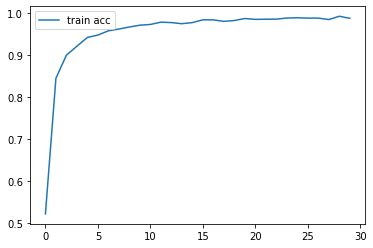

In [51]:
plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [52]:
import glob

train_image_names = glob.glob('D:/senior year/GP/datasets/dataset-augmented trial/train/*/*.png')
print("Total number of training images: ", len(train_image_names))

# make train_image_names as serie object
train_image_names = pd.Series(train_image_names)


Total number of training images:  9243


In [53]:
test_image_names = glob.glob('D:/senior year/GP/datasets/dataset-augmented trial/test/*/*.png')
print("Total number of testing images: ", len(test_image_names))

# make train_image_names as serie object
test_image_names = pd.Series(test_image_names)

Total number of testing images:  2120


In [54]:
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: int(float(img_name.split("\\")[-2])))

# train_df.head()


test_df = pd.DataFrame()
test_df['Filename'] = test_image_names.map(lambda img_name: img_name.split("/")[-1])
test_df['ClassId'] = test_image_names.map(lambda img_name: int(float(img_name.split("\\")[-2])))

In [55]:
class_id_distribution = train_df['ClassId'].value_counts()
class_id_distribution_test = test_df['ClassId'].value_counts()

#number of train images in each class
# for i in range(0,106):
#     print("class " +str(i) +" ---> " +str(class_id_distribution[i])  )

#number of test images in each class
# for i in range(0,106):
#     print("class " +str(i) +" ---> " +str(class_id_distribution_test[i])  )

<BarContainer object of 106 artists>

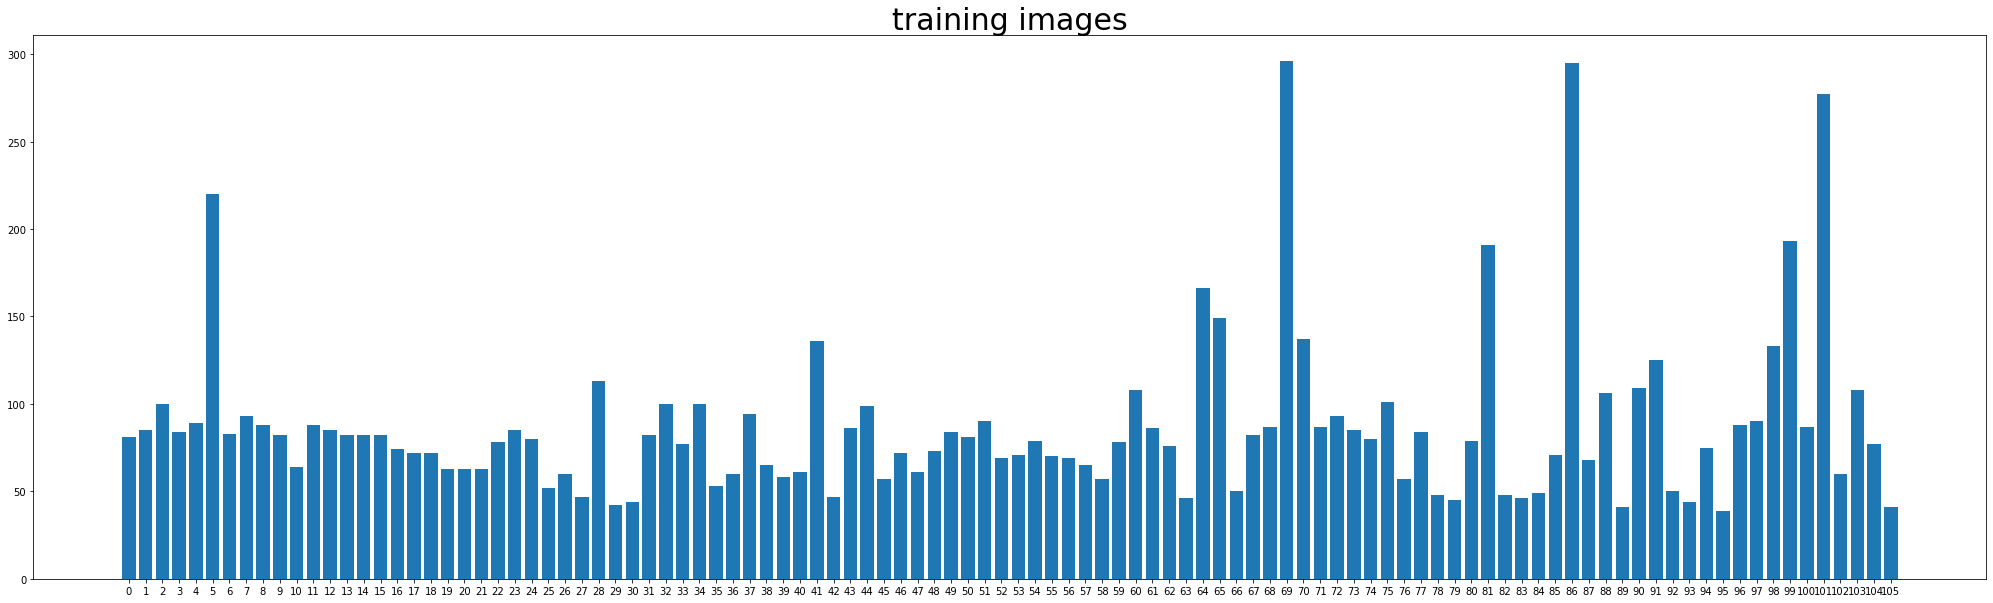

In [56]:
plt.figure(figsize=(35,10))
plt.xticks(np.arange(106))
plt.title("training images",  fontsize=30)
plt.bar(class_id_distribution.index, class_id_distribution.values)

<BarContainer object of 106 artists>

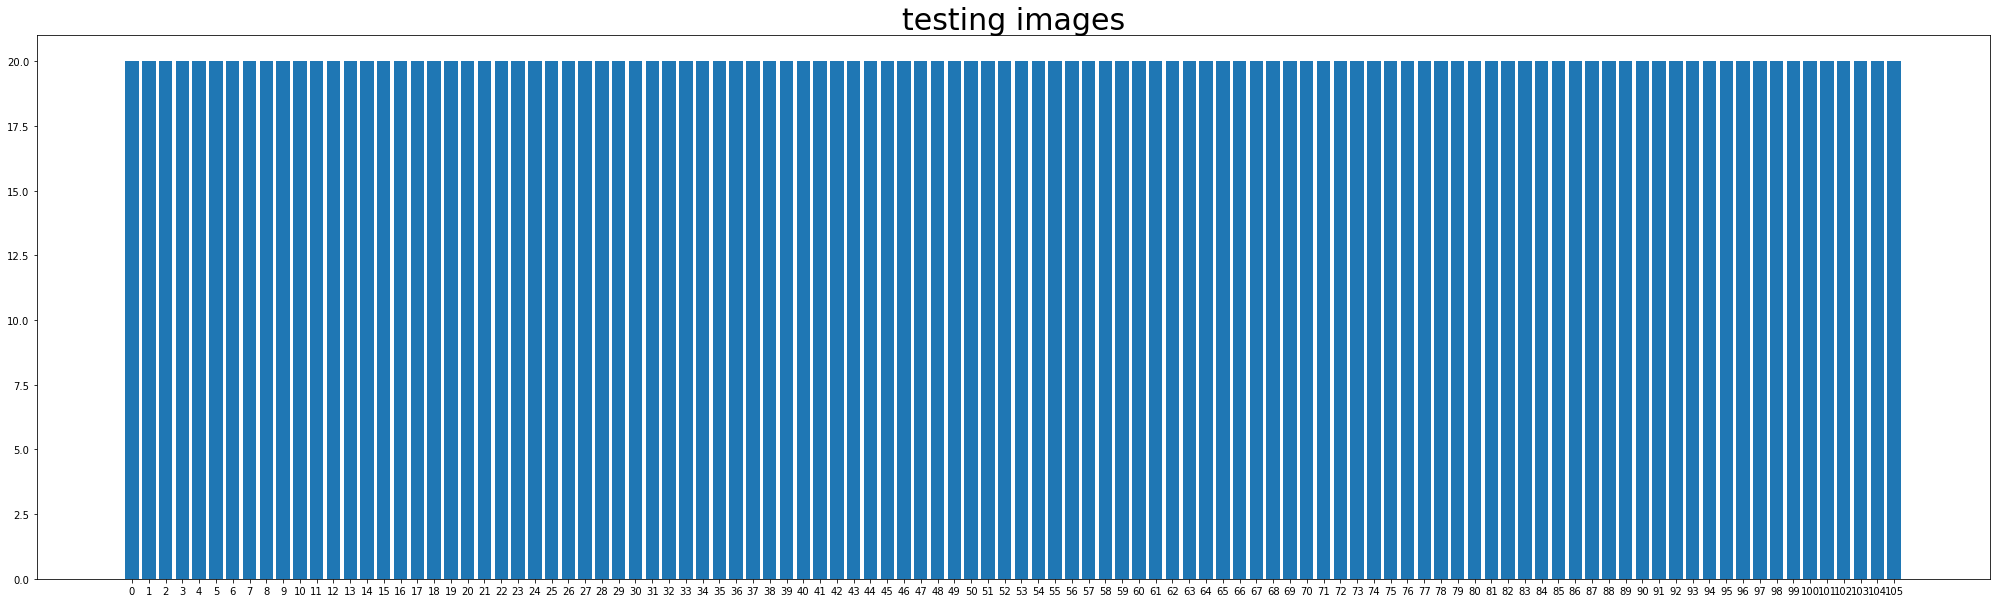

In [57]:
plt.figure(figsize=(35,10))
plt.xticks(np.arange(106))
plt.title("testing images",  fontsize=30)
plt.bar(class_id_distribution_test.index, class_id_distribution_test.values)

In [58]:
import glob

data_image_names = glob.glob('D:/senior year/GP/datasets/dataset-augmented trial/train/*/*.png')
print("Total number of training images: ", len(data_image_names))

# make train_image_names as serie object
data_image_names = pd.Series(data_image_names)

Total number of training images:  9243


In [59]:
data_df = pd.DataFrame()
data_df['Filename'] = data_image_names.map(lambda img_name: img_name.split("/")[-1])
data_df['ClassId'] = data_image_names.map(lambda img_name: int(float(img_name.split("\\")[-2])))

<BarContainer object of 106 artists>

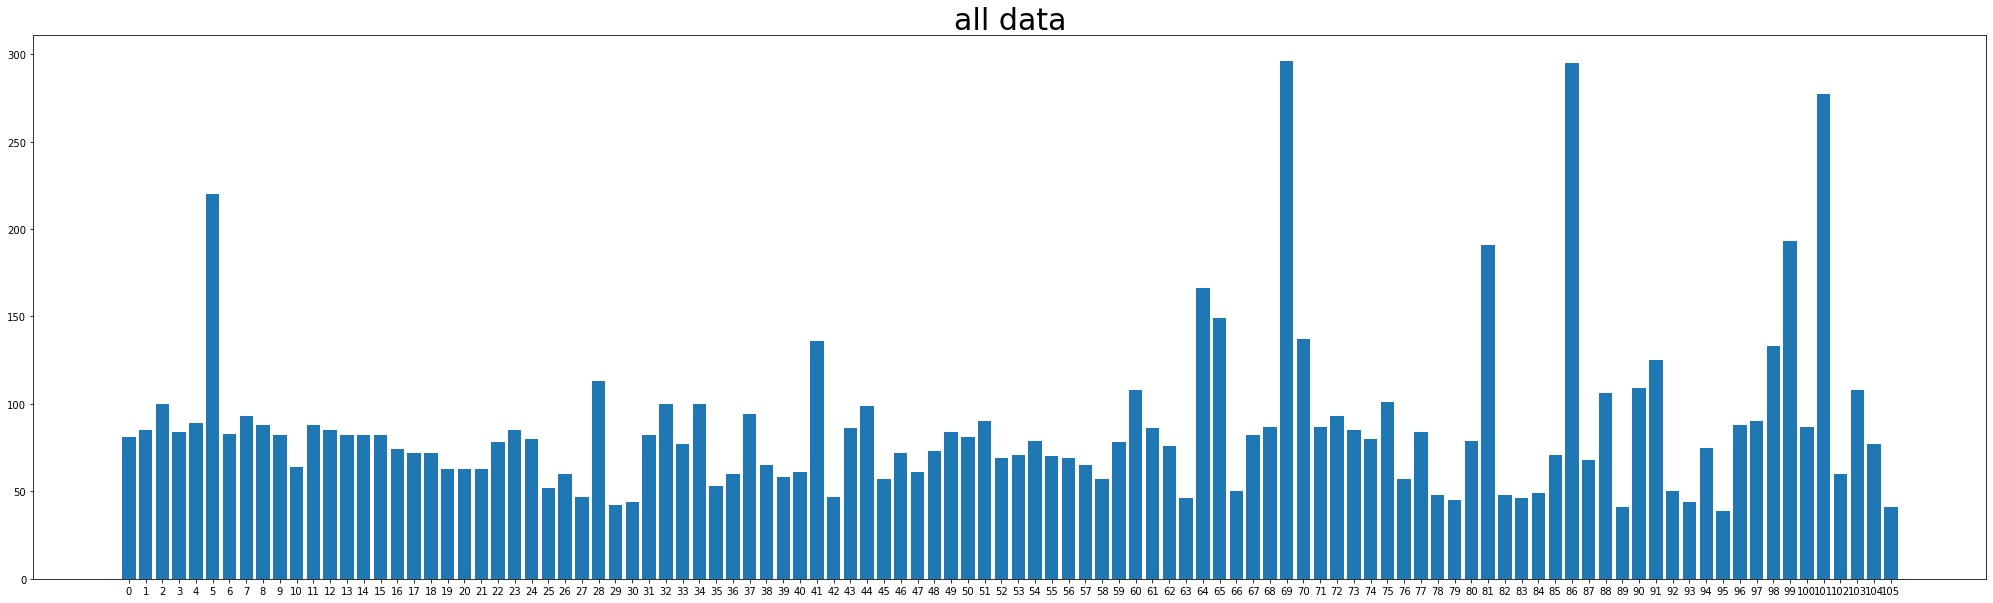

In [60]:
classes_id_distribution = data_df['ClassId'].value_counts()

plt.figure(figsize=(35,10))
plt.xticks(np.arange(106))
plt.title("all data",  fontsize=30)
plt.bar(classes_id_distribution.index, classes_id_distribution.values)

In [61]:
# import Augmentor

# # Build a new pipeline for image processing.
# p = Augmentor.Pipeline(
#     source_directory="D:/senior year/GP/datasets/dataset-augmented trial/dataset augmented/072",
#     output_directory="D:/senior year/GP/datasets/dataset-augmented trial/dataset augmented/072")

# # Manipulate the example card.
# p.rotate_without_crop(
#     probability=.5,
#     max_left_rotation=10,
#     max_right_rotation=10,
#     expand=True)
# # p.zoom(
# #     probability=.3,
# #     min_factor=.8,
# #     max_factor=1.1)
# p.skew(
#     probability=.3,
#     magnitude=.15)
# p.random_brightness(
#     probability=.5,
#     min_factor=.5,
#     max_factor=1.75)
# p.flip_left_right(probability=0.4)

# # Generate and save X new images to the output directory.
# p.sample(50)

In [62]:

# data_image_names = glob.glob('D:/senior year/GP/datasets/dataset-augmented trial/dataset augmented/*/*.png')
# print("Total number of training images: ", len(data_image_names))

# # make train_image_names as serie object
# data_image_names = pd.Series(data_image_names)

# data_df = pd.DataFrame()
# data_df['Filename'] = data_image_names.map(lambda img_name: img_name.split("/")[-1])
# data_df['ClassId'] = data_image_names.map(lambda img_name: int(float(img_name.split("\\")[-2])))


# classes_id_distribution = data_df['ClassId'].value_counts()

# plt.figure(figsize=(35,10))
# plt.xticks(np.arange(106))
# plt.title("after",  fontsize=30)
# plt.bar(classes_id_distribution.index, classes_id_distribution.values)